# TASK3:SALES PREDICTION USING PYTHON

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('downloads/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

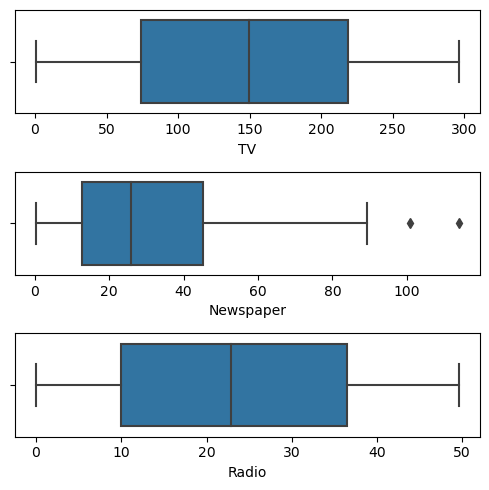

In [8]:
fig,axs=plt.subplots(3, figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Newspaper'],ax=axs[1])
plt3=sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

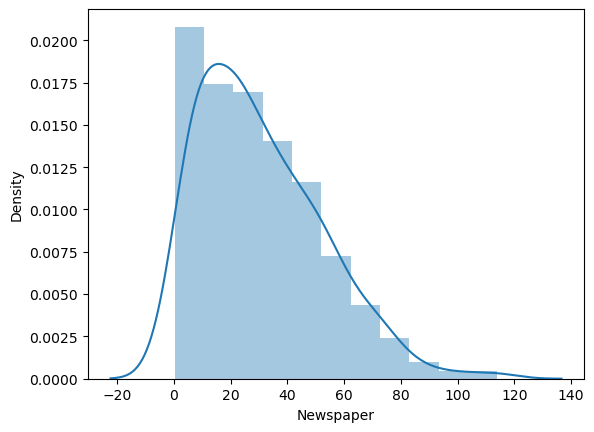

In [9]:
sns.distplot(df['Newspaper'])

In [10]:
iqr=df.Newspaper.quantile(0.75)-df.Newspaper.quantile(0.25)

In [11]:
lower_bridge=df['Newspaper'].quantile(0.25)-(iqr*1.5)
upper_bridge=df['Newspaper'].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [12]:
data=df.copy()

In [13]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

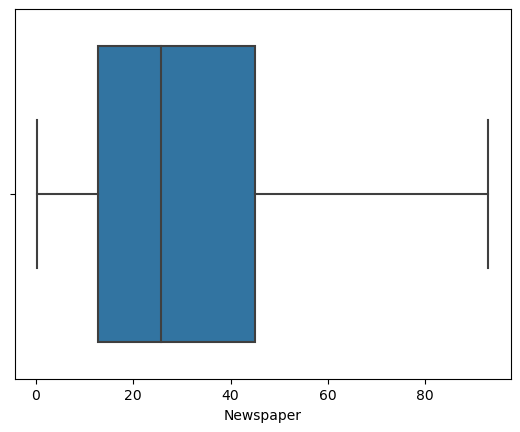

In [14]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:xlabel='Sales'>

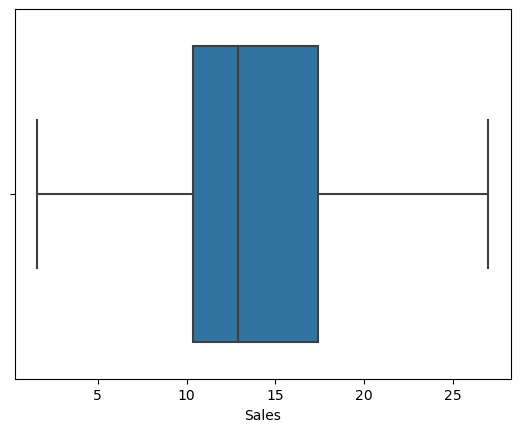

In [15]:
sns.boxplot(data['Sales'])

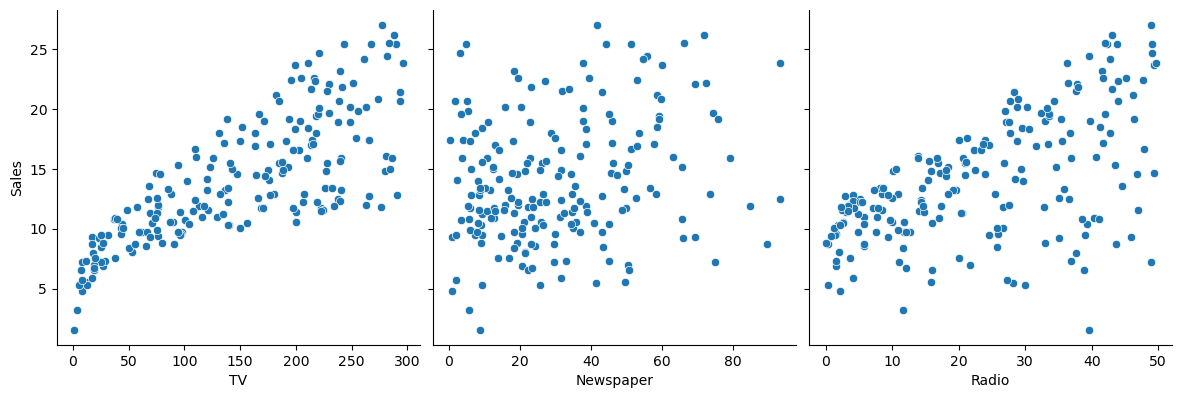

In [16]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
             y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

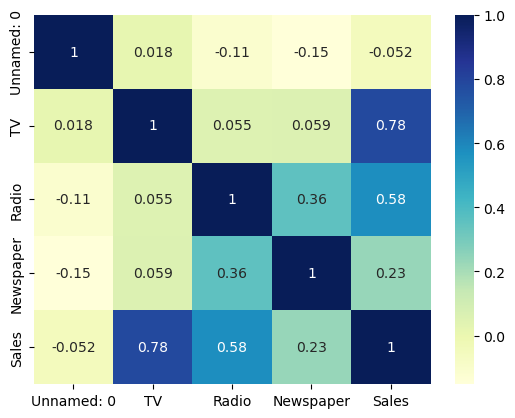

In [17]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [18]:
important_features=list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [19]:
print(important_features)

['TV', 'Radio', 'Sales']


In [20]:
x=data['TV']
y=data['Sales']

In [21]:
x=x.values.reshape(-1,1)
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [22]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [23]:
print(x.shape,y.shape)

(200, 1) (200,)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)


In [25]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [27]:
knn=KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [28]:
knn_train_pred=knn.predict(x_train)

In [29]:
knn_test_pred=knn.predict(x_test)

In [30]:
print(knn_train_pred,knn_test_pred)

[ 8.4  10.54 14.66 13.56 14.06 13.12 16.38 14.66  9.72  9.6  10.66 10.42
 16.94 19.16 11.54 19.16 17.7  18.96 17.14  7.18 20.52 18.96 15.34 14.12
  7.18 16.98 19.16 21.44 11.3  13.58 11.54 11.32 16.94 10.7   9.12 17.7
 11.54 14.06 10.94 21.3  17.36 15.7  10.42  9.98  7.38 18.96 16.32 17.28
  7.72 18.6   9.6  13.56 10.66 17.14 10.94 15.48  9.6  18.26 18.6  14.36
 14.88 10.8  10.68 17.16 16.32 17.56 14.12 18.96 14.36 17.48 11.22 13.96
  6.48 15.72 14.12 18.52 10.66  7.18 14.56  7.72 20.98 11.3   6.42 21.3
  6.42 14.54 12.66  8.02 10.9  14.88 18.52 12.66 10.7   8.4   7.72 14.06
 13.56 12.66  8.02 13.66 17.56 16.32 16.32 16.28  6.42 14.46 15.72 13.12
 14.2  21.3  10.66  7.36 15.34 19.88 21.3  11.32 17.48 17.7  18.44 17.48
 14.2  14.12 15.42  7.18 11.3  17.28 11.54 17.16 13.72 10.66 15.28  6.42
 11.24 18.96] [13.2  18.72 10.7   6.42 15.72 14.64 17.1  14.88  6.42 17.14 18.96 16.28
 20.52  7.36 13.56 10.7  10.66  9.72 18.26  6.42  8.4  18.72 18.44 10.72
 18.26 14.26 10.54 20.9  18.44 11.54 13

In [31]:
Results=pd.DataFrame(columns=['Model','Train R2','Test R2','Test RMSC','Variance'])

In [32]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance=r2_train-r2
Results=Results.append({'Model':'K-Nearest Neighbors','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5406911551571059
RMSE: 3.768001640609564


In [33]:
Results.head()

,Model,Train R2,Test R2,Test RMSC,Variance,Test RMSE
0,K-Nearest Neighbors,0.643434,0.540691,NaN,0.102743,3.768002


In [34]:
svr=SVR().fit(x_train,y_train)
svr

SVR()

In [35]:
svr_train_pred=svr.predict(x_train)
svr_test_pred=svr.predict(x_test)

In [36]:
print(svr_train_pred,svr_test_pred)

[ 8.40175362  8.80076005 15.44577279 13.98324751 13.00028519 11.91886549
 16.77660343 15.41324978  9.16663859  9.66529692 10.09676076  8.69904076
 15.81012806 16.98289801 10.41930444 16.92100179 17.52272254 17.53184705
 17.49965005  8.14085084 17.00772055 17.5368982  17.40207333 13.46080259
  8.12138669 15.92695541 17.00206674 16.90079841 11.29977985 15.27104049
 10.41930444 10.49960658 15.7169636   9.01354985  8.5002981  17.51785856
 10.41483919 12.96889596 11.01046352 16.63461227 16.42267901 13.1374576
  8.74164661  9.39362116  8.10028513 16.22780393 14.76694538 17.32087197
  8.08446573 17.20431067  9.51336571 13.84836734 10.03384042 17.48514992
 11.04153949 17.49511367  9.57133576 17.53085573 17.22426686 15.51582373
 16.58016692 10.89953795  9.78649443 16.3244945  14.88576279 17.14361716
 13.40085173 17.53184705 15.51582373 17.25541378 11.48830616 12.21228815
  7.97911298 17.4147779  13.51554706 17.01559883  9.99337117  8.11900018
 15.04323513  8.07784698 16.80242806 11.27744113  7.

In [37]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance=r2_train-r2
Results=Results.append({'Model':'K-Nearest Neighbors','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5406911551571059
RMSE: 3.768001640609564


In [38]:
Results.head()

,Model,Train R2,Test R2,Test RMSC,Variance,Test RMSE
0,K-Nearest Neighbors,0.643434,0.540691,NaN,0.102743,3.768002
1,K-Nearest Neighbors,0.643434,0.540691,NaN,0.102743,3.768002


In [39]:
import statsmodels.api as sm

In [40]:
x_train_constant=sm.add_constant(x_train)

In [41]:
model=sm.OLS(y_train,x_train_constant).fit()

In [42]:
model.params

const    7.421646
x1       0.044746
dtype: float64

In [43]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           4.45e-27
Time:                        10:49:10   Log-Likelihood:                -347.03
No. Observations:                 134   AIC:                             698.1
Df Residuals:                     132   BIC:                             703.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4216      0.549     13.510      0.0

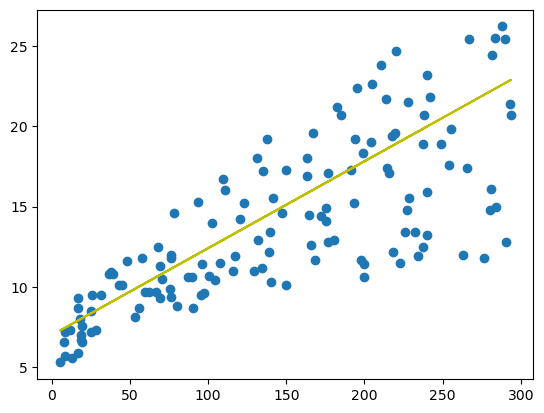

In [44]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955+0.0541*x_train,'y')
plt.show()

In [45]:
y_train_pred=model.predict(x_train_constant)
res=(y_train-y_train_pred)
res

91    -1.401373
190    1.610899
112   -1.183465
194    3.179923
159   -0.414654
         ...   
65    -1.209099
193    4.714772
132   -2.097510
63     1.982971
47     5.043862
Name: Sales, Length: 134, dtype: float64

In [46]:
y_train_pred

array([ 8.70137263,  9.18910073, 15.28346468, 14.12007655, 13.31465401,
       12.33472324, 16.55424248, 15.25661726,  9.58286287, 10.08848925,
       10.51804794,  9.07276192, 15.59220999, 20.01308486, 10.84021696,
       20.1115254 , 18.08007075, 18.16508757, 18.77810362,  8.29866136,
       16.85403865, 18.23668069, 17.58786808, 13.699467  ,  8.2628648 ,
       15.69512509, 19.98176288, 20.14284739, 11.72618176, 15.14027845,
       10.84021696, 10.92075921, 15.51166773,  9.42177836,  8.83113516,
       18.04427419, 10.83574239, 13.28780659, 11.43533473, 20.52766038,
       16.16495491, 13.43099282,  9.12198219,  9.81554049,  8.22259368,
       15.97254842, 14.73756717, 19.36427226,  8.19127169, 17.16278396,
        9.93635387, 14.01268688, 10.45540396, 18.84969674, 11.46665672,
       17.91451167,  9.99452328, 18.55437514, 17.19858052, 15.34163409,
       16.33051399, 11.32347049, 10.20930263, 16.06651438, 14.83153314,
       17.05986885, 13.65024674, 18.16508757, 15.34163409, 17.25

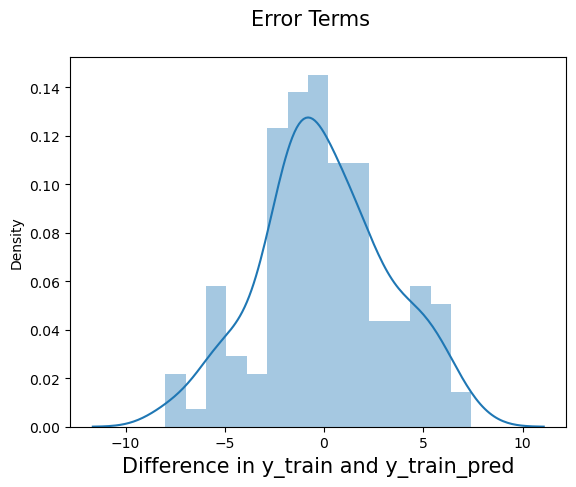

In [47]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize=15)
plt.show()

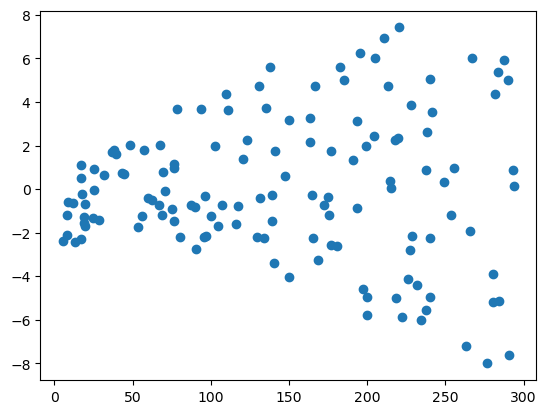

In [48]:
plt.scatter(x_train,res)
plt.show()

In [49]:
x_test_constant=sm.add_constant(x_test)
y_pred=model.predict(x_test_constant)

In [50]:
y_pred

array([13.81580581, 15.85173503,  9.34571067,  7.74828929, 17.69078318,
       13.51600964, 18.12929102, 16.32156485,  7.80645869, 17.12251283,
       18.30379923, 17.37308873, 16.84956408,  8.00781433, 14.20061881,
        9.41282922, 11.25635194,  9.65893055, 18.53647686,  7.60510306,
        8.62083038, 15.82936218, 19.28820457, 10.70597987, 18.6483411 ,
       13.04617982,  9.13093133, 16.80034381, 19.11369635, 10.78204755,
       12.4734349 , 11.78435117, 20.68427032, 10.79099669, 19.17634033,
        8.65215237, 15.82488761,  7.45296769, 17.7176306 , 17.28807191,
        8.48659329, 11.37269075, 17.44468185, 15.08658361, 13.66367044,
       15.69512509, 12.33472324, 20.21891507, 14.42882186, 17.10461455,
       16.48264936, 16.67505586, 16.67953043, 19.668543  , 16.97037746,
       12.80007849, 19.81172923, 15.03736335, 12.83587505, 16.26339545,
       10.37933628, 17.19410595, 10.48225138, 11.63669037, 10.76414927,
       18.15166386])

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.30434472805016

In [53]:
r2=r2_score(y_test,y_pred)
r2

0.6467734493161341

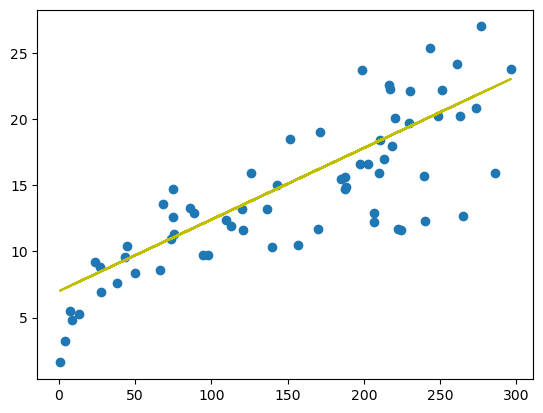

In [54]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955+0.0541*x_test,'y')
plt.show()